In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#import total data
usmodels_df = pd.read_csv("us_energy_merged.csv")
usmodels_df.head()

,year,production,consumption,population,price
0,1970,4070021.0,67720114.0,205052.0,1.65
1,1971,4262212.0,69163993.0,207661.0,1.76
2,1972,4382009.0,72677208.0,209896.0,1.84
3,1973,4410938.0,75723857.0,211909.0,2.02
4,1974,4741851.0,73914525.0,213854.0,2.87


In [3]:
#calulate excess between produced and consumed
usmodels_df["variance"] = usmodels_df["production"]-usmodels_df["consumption"]
usmodels_df

,year,production,consumption,population,price,variance
0,1970,4070021.0,67720114.0,205052.0,1.65,-63650093.0
1,1971,4262212.0,69163993.0,207661.0,1.76,-64901781.0
2,1972,4382009.0,72677208.0,209896.0,1.84,-68295199.0
3,1973,4410938.0,75723857.0,211909.0,2.02,-71312919.0
4,1974,4741851.0,73914525.0,213854.0,2.87,-69172674.0
5,1975,4687119.0,71953031.0,215973.0,3.33,-67265912.0
6,1976,4727151.0,75966653.0,218035.0,3.57,-71239502.0
7,1977,4208966.0,77946963.0,220239.0,3.98,-73737997.0
8,1978,5005439.0,79978066.0,222585.0,4.23,-74972627.0
9,1979,5122854.0,80835915.0,225055.0,5.22,-75713061.0


In [10]:
# select the features 
X = usmodels_df[["year", "production", "population", "price"]]
y = usmodels_df["variance"].values.reshape(-1,1)

In [11]:
# train test and split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
# create the linear regresson model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
#show mse and r2 score
predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
print(MSE, r2)


6533261654383.541 0.926085147366005


In [ ]:
#use linear regression to prediction the future for the features


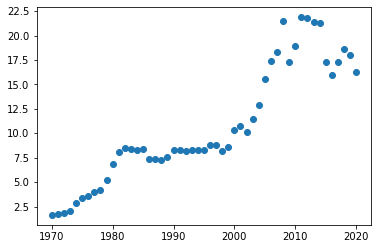

In [13]:
#create price prediction
X1 = usmodels_df["year"].values.reshape(-1,1)
y1 = usmodels_df["price"].values.reshape(-1,1)
plt.scatter(X1,y1)

In [14]:
# train test and split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)

In [15]:
#create price linear regression model
modelprice = LinearRegression()
modelprice.fit(X1_train, y1_train)


LinearRegression()

In [16]:
# use mean_squared_error 

predictionsprice = modelprice.predict(X1_test)
MSE1 = mean_squared_error(y1_test, predictionsprice)
r2 = modelprice.score(X1_test, y1_test)

print(MSE1, r2)

5.53472193871103 0.8225362992194662


In [17]:
# predict the price from 2021 to 2035
price = []

for x in range(2021, 2036):
    p = modelprice.predict([[x]])
    price.append(float(p))
    
price

[20.86740511949222,
 21.253420346535336,
 21.639435573578567,
 22.025450800621797,
 22.41146602766503,
 22.79748125470826,
 23.18349648175149,
 23.56951170879472,
 23.955526935837952,
 24.341542162881183,
 24.727557389924414,
 25.113572616967645,
 25.499587844010875,
 25.885603071054106,
 26.271618298097337]

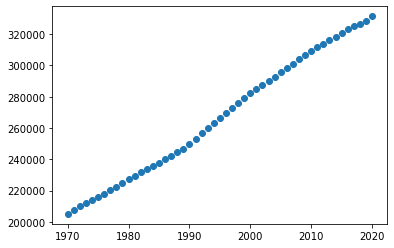

In [18]:
#create population prediction
X2 = usmodels_df["year"].values.reshape(-1,1)
y2 = usmodels_df["population"].values.reshape(-1,1)
plt.scatter(X2,y2)

In [19]:
# train test and split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)


In [20]:
#create population linear regression model
modelpop = LinearRegression()
modelpop.fit(X2_train, y2_train)


LinearRegression()

In [21]:
# use mean_squared_error 

predictionspop = modelpop.predict(X2_test)
MSE2 = mean_squared_error(y2_test, predictionspop)
r2 = modelpop.score(X2_test, y2_test)

print(MSE2, r2)

3985842.8025597837 0.9973741005735772


In [22]:
# predict the price from 2021 to 2035
population = []
for x in range(2021, 2036):
    k = modelpop.predict([[x]])
    population.append(float(k))
    
population

[336085.91595313326,
 338731.22238856275,
 341376.52882399224,
 344021.8352594208,
 346667.1416948503,
 349312.4481302798,
 351957.75456570927,
 354603.06100113876,
 357248.3674365673,
 359893.6738719968,
 362538.9803074263,
 365184.2867428558,
 367829.5931782853,
 370474.8996137148,
 373120.20604914334]

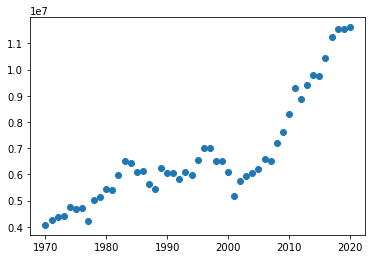

In [23]:
#create production prediction
X3 = usmodels_df["year"].values.reshape(-1,1)
y3 = usmodels_df["production"].values.reshape(-1,1)
plt.scatter(X3,y3)

In [24]:
# train test and split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=42)

In [25]:
#create production linear regression model
modelprod = LinearRegression()
modelprod.fit(X3_train, y3_train)


LinearRegression()

In [26]:
# use mean_squared_error
predictionsprod = modelprod.predict(X3_test)
MSE3 = mean_squared_error(y3_test, predictionsprod)
r2 = modelprod.score(X3_test, y3_test)

print(MSE3, r2)

1419407471618.3945 0.6971068516616239


In [27]:
# predict the renewable production from 2021 to 2035
production = []
for x in range(2021, 2036):
    l = modelprod.predict([[x]])
    production.append(float(l))

production


[9803617.862046212,
 9921656.48791936,
 10039695.113792509,
 10157733.739665657,
 10275772.365538806,
 10393810.991411954,
 10511849.617285103,
 10629888.243158251,
 10747926.86903143,
 10865965.494904578,
 10984004.120777726,
 11102042.746650875,
 11220081.372524023,
 11338119.998397171,
 11456158.62427032]

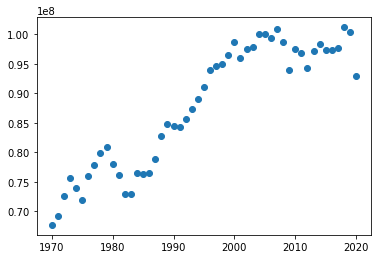

In [28]:
#create consumption predictions
X4 = usmodels_df["year"].values.reshape(-1,1)
y4 = usmodels_df["consumption"].values.reshape(-1,1)
plt.scatter(X4,y4)

In [29]:
# train test and split
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, random_state=42)

In [30]:
#create consumption linear regression model
modelcons = LinearRegression()
modelcons.fit(X4_train, y4_train)

LinearRegression()

In [31]:
# use mean_squared_error 
predictionscons = modelcons.predict(X4_test)
MSE4 = mean_squared_error(y4_test, predictionscons)
r2 = modelcons.score(X4_test, y4_test)

print(MSE4, r2)


19957600154609.332 0.8181798570593897


In [32]:
# predict the renewable consumption from 2021 to 2035
consumption = []
for x in range(2021, 2036):
    c = modelcons.predict([[x]])
    consumption.append(float(c))

consumption


[104821125.52050829,
 105473329.40555215,
 106125533.29059601,
 106777737.17563987,
 107429941.06068373,
 108082144.94572759,
 108734348.83077145,
 109386552.7158153,
 110038756.60085917,
 110690960.48590302,
 111343164.37094688,
 111995368.2559905,
 112647572.14103436,
 113299776.02607822,
 113951979.91112208]

In [33]:
# use all data from predictions to calculate future variance
variance = []

listresults = [[2021,9803617.862046212,336085.91595313326,20.86740511949222], 
             [2022,9921656.48791936, 338731.22238856275,21.253420346535336],
             [2023, 10039695.113792509,341376.52882399224,21.639435573578567],
             [2024,10157733.739665657,344021.8352594208,22.025450800621797],
             [2025, 10275772.365538806,346667.1416948503,22.41146602766503],
             [2026,10393810.991411954,349312.4481302798,22.79748125470826],
             [2027,10511849.617285103,351957.75456570927,23.18349648175149],
             [2028,10629888.243158251,354603.06100113876,23.56951170879472],
             [2029,10747926.86903143,357248.3674365673,23.955526935837952],
             [2030,10865965.494904578,359893.6738719968,24.341542162881183],
             [2031,10984004.120777726,362538.9803074263,24.727557389924414],
             [2032,11102042.746650875,365184.2867428558,25.113572616967645],
             [2033,11220081.372524023,367829.5931782853,25.499587844010875], 
            [2034,11338119.998397171,370474.8996137148,25.885603071054106], 
            [2035,11456158.62427032,373120.20604914334,26.271618298097337]] 

for x in listresults:
    v = model.predict([x])
    variance.append(float(v))
    
variance 


[-95017507.65846229,
 -95551672.91763282,
 -96085838.17680383,
 -96620003.43597412,
 -97154168.69514513,
 -97688333.95431566,
 -98222499.2134862,
 -98756664.4726572,
 -99290829.7318275,
 -99824994.99099827,
 -100359160.2501688,
 -100893325.50933981,
 -101427490.76851034,
 -101961656.02768135,
 -102495821.28685188]

In [34]:
# create dictionary for future years predictions
predictionresults_dict = {
    "year":[2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035],
    "produced_renewable": production,
    "total_consumed": consumption,
    "population": population,
    "energy_price": price,
    "difference": variance
}

# create new dataframe with predictions
predictionresults_df = pd.DataFrame(predictionresults_dict)
predictionresults_df

,year,produced_renewable,total_consumed,population,energy_price,difference
0,2021,9.803618e+06,1.048211e+08,336085.915953,20.867405,-9.501751e+07
1,2022,9.921656e+06,1.054733e+08,338731.222389,21.253420,-9.555167e+07
2,2023,1.003970e+07,1.061255e+08,341376.528824,21.639436,-9.608584e+07
3,2024,1.015773e+07,1.067777e+08,344021.835259,22.025451,-9.662000e+07
4,2025,1.027577e+07,1.074299e+08,346667.141695,22.411466,-9.715417e+07
5,2026,1.039381e+07,1.080821e+08,349312.448130,22.797481,-9.768833e+07
6,2027,1.051185e+07,1.087343e+08,351957.754566,23.183496,-9.822250e+07
7,2028,1.062989e+07,1.093866e+08,354603.061001,23.569512,-9.875666e+07
8,2029,1.074793e+07,1.100388e+08,357248.367437,23.955527,-9.929083e+07
9,2030,1.086597e+07,1.106910e+08,359893.673872,24.341542,-9.982499e+07


In [ ]:
# save new prediction results dataframe to csv
#predictionresults_df.to_csv("static/csv/us_future_predictions.csv",index=False, float_format='%.1f')


In [ ]:
# rename columns of original cleaned dataframe to make them more descriptive
usmodels_df = usmodels_df.rename(columns={'production': 'produced_renewable', 'consumption': 'total_consumed', ' price': 'energy_price', 'variance': 'difference'})
usmodels_df

In [ ]:
# combine original dataframe in new prediction dataframe
dfs = [usmodels_df, predictionresults_df]
full_us_df = pd.concat(dfs, ignore_index=True)
pd.options.display.float_format = '{:.1f}'.format
full_us_df

In [ ]:
# export to csv
#full_us_df.to_csv("static/csv/full_us_data.csv",index=False, float_format='%.1f')